In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

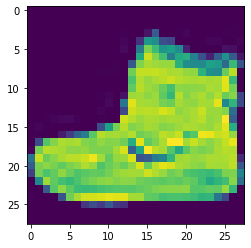

In [4]:
plt.imshow(train_images[0])

## Limpieza de datos

In [5]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') /255

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

In [7]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

## Modelo de datos

In [8]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

2022-04-09 17:55:43.505975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 17:55:43.603892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 17:55:43.604675: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 17:55:43.605945: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

## Compilar - entrenar

In [9]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
              metrics=['accuracy']
             )

In [10]:
model.fit(train_images, train_labels, batch_size=64, epochs=10)

2022-04-09 17:55:46.388740: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-04-09 17:55:47.830119: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


938/938 [==============================] - 11s 4ms/step - loss: 0.5705 - accuracy: 0.7934
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3928 - accuracy: 0.8609
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3501 - accuracy: 0.8756
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3290 - accuracy: 0.8827
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3227 - accuracy: 0.8858
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3159 - accuracy: 0.8882
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3150 - accuracy: 0.8904
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3137 - accuracy: 0.8906
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3161 - accuracy: 0.8899
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3122 - accuracy: 0.8920


In [11]:
model.evaluate(test_images, test_labels, verbose=0)

[0.3167097866535187, 0.897599995136261]

In [12]:
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)

In [13]:
model.fit(train_images, train_labels, batch_size=64, callbacks=[early], epochs=10)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3111 - accuracy: 0.8915
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3162 - accuracy: 0.8924
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3158 - accuracy: 0.8914


In [14]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='mi_primer_red_conv.hdf5',
                                               verbose=1,
                                               monitor='accuracy',
                                               save_best_only=True
                                               )
model.fit(train_images, train_labels, batch_size=64, callbacks=[checkpoint], epochs=10)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3184 - accuracy: 0.8907

Epoch 00001: accuracy improved from -inf to 0.89068, saving model to mi_primer_red_conv.hdf5
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3171 - accuracy: 0.8917

Epoch 00002: accuracy improved from 0.89068 to 0.89170, saving model to mi_primer_red_conv.hdf5
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3177 - accuracy: 0.8921

Epoch 00003: accuracy improved from 0.89170 to 0.89215, saving model to mi_primer_red_conv.hdf5
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3224 - accuracy: 0.8900

Epoch 00004: accuracy did not improve from 0.89215
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3238 - accuracy: 0.8917

Epoch 00005: accuracy did not improve from 0.89215
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3260 - accuracy: 0.8904

Epoch 0

## Carga de mejor epoch

In [15]:
model2 = model
model2.load_weights('./mi_primer_red_conv.hdf5')

In [16]:
model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3100 - accuracy: 0.9031


[0.30997735261917114, 0.9031000137329102]